In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sys.path.append('/Users/ratzenboe/Documents/work/projects/AstroSimformer/simulator/modules')
from ClusterSim import ClusterSim

ModuleNotFoundError: No module named 'utils.cluster_sampler'; 'utils' is not a package

In [2]:
from scipy.stats import truncnorm
def sample_truncated_normal(mean, sd, low, upp):
    return truncnorm.rvs(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd
    )

# Load field stars

In [3]:
fname = '/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/edr3_mock_1kpc_sphere_IRphot_May2024_FINAL.csv'
df_field = pd.read_csv(fname)

In [4]:
other_features = [
    'X', 'Y', 'Z', 'X_obs', 'Y_obs', 'Z_obs'
]

input_features = [
    # Observed values
    'parallax_obs', 'phot_g_mean_mag_obs', 'phot_bp_mean_mag_obs', 'phot_rp_mean_mag_obs', 
    'j_obs', 'h_obs', 'k_obs', 
    'w1_obs', 'w2_obs', 'w3_obs', 'w4_obs', 
    'irac1_obs', 'irac2_obs', 'irac3_obs', 'irac4_obs', 'mips1_obs',
    # Uncertainties
    'parallax_error', 'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error',
    'j_error', 'h_error', 'k_error', 
    'w1_error', 'w2_error', 'w3_error', 'w4_error', 
    'irac1_error', 'irac2_error', 'irac3_error', 'irac4_error', 'mips1_error',
]
output_features = [
    'parallax', 'logAge', 'feh', 'A_V'
]

# Remove sources which have missing values
df_field_subcols = df_field[input_features + output_features + other_features]
df_field_subcols.shape

(227154, 42)

In [5]:
df_field_subcols.isna().sum(axis=0)

parallax_obs                   0
phot_g_mean_mag_obs            0
phot_bp_mean_mag_obs           0
phot_rp_mean_mag_obs           0
j_obs                      60962
h_obs                      53389
k_obs                      61228
w1_obs                       822
w2_obs                      1477
w3_obs                    178198
w4_obs                    218943
irac1_obs                   1027
irac2_obs                    769
irac3_obs                   1269
irac4_obs                  11523
mips1_obs                 199646
parallax_error                 0
phot_g_mean_mag_error          0
phot_bp_mean_mag_error         0
phot_rp_mean_mag_error         0
j_error                    60962
h_error                    53389
k_error                    61228
w1_error                     822
w2_error                    1477
w3_error                  178198
w4_error                  218943
irac1_error                 1027
irac2_error                  769
irac3_error                 1269
irac4_erro

# Simulate clusters

In [6]:
# ------ Path files ------
fpath = '/Users/ratzenboe/Documents/work/code/notebooks/SBI/'
ir_files = fpath + 'isochrone_files/ir_phot/'
gaia_files = fpath + 'isochrone_files/gaia_phot/'
fname_spline_csv = fpath + 'LogErrVsMagSpline.csv'
fname_astrometric_corr = fpath + 'astrometric_corr.npz'
# ------------------------

In [7]:
cols_observed = [
    'X', 'Y', 'Z',
    'parallax', 
    'pmra', 'pmdec', 'radial_velocity',
    'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
    'j', 'h', 'k', 'w1', 'w2', 'w3', 'w4',
    'irac1', 'irac2', 'irac3', 'irac4', 'mips1'
]

cols_errs = [
    'parallax_error',
    'pmra_error', 'pmdec_error', 'radial_velocity_error',
    'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error',
    'j_error', 'h_error', 'k_error', 'w1_error', 'w2_error', 'w3_error',
    'w4_error', 'irac1_error', 'irac2_error', 'irac3_error', 'irac4_error', 'mips1_error',
]

In [8]:
kwargs = dict(
    mu=[200, 10, -10, 20, 20, -10],
    cov=np.eye(6),
    mass=1e3,
    logAge=6.7,
    feh=-0.1,
    A_V=0.5,
    f_bin=0.1,
    parsec_gaia_folder=gaia_files,
    parsec_ir_folder=ir_files,
    spline_csv=fname_spline_csv, 
    astrometric_corr=fname_astrometric_corr,
    errors_outside_range=np.nan,
)

cl_sim = ClusterSim(**kwargs)

PARSEC isochrones read and processed!
PARSEC isochrones read and processed!
Total cluster mass is 1000.92 (limit was 1000)
Initializing the scanning law object...
Estimating completeness...


In [9]:
# x_pt = 500 #/np.sqrt(2)

In [10]:
# lin_age = 3
# logAge = np.log10(lin_age*1e6)
# feh_cluster = 0.0
# A_V_local = 0.5
# 
# df_obs_all = cl_sim.data_observed(
#     mu=[x_pt, x_pt, 0, 0., 1., 2.], cov=np.eye(6)*25, 
#     mass=6e2, logAge=logAge, feh=feh_cluster, 
#     A_V=A_V_local, f_bin=0.1,
# )
# df_true_all = cl_sim.data_true()
# # Rename columns
# c_obs_all = cols_observed + ['ra', 'dec', 'pmra', 'pmdec', 'radial_velocity'] #, 'M_G']
# df_cluster = df_obs_all.rename(columns={col: col + '_obs' for col in c_obs_all}, inplace=False)
# df_cluster['parallax_true'] = df_true_all['parallax'].values
# df_cluster['mass_true'] = df_true_all['mass'].values
# df_cluster['is_binary_true'] = df_true_all['is_binary'].values.astype(bool)
# df_cluster['X_true'] = df_true_all['X'].values
# df_cluster['Y_true'] = df_true_all['Y'].values
# df_cluster['Z_true'] = df_true_all['Z'].values
# df_cluster['logAge_true'] = logAge
# df_cluster['feh_true'] = feh_cluster
# df_cluster['A_V_true'] = A_V_local

In [11]:
# # df_cluster['M_G_obs'] = df_cluster.phot_g_mean_mag_obs - 5*np.log10(1e3/df_cluster['parallax_obs']) + 5
# 
# plt.scatter(df_cluster['phot_bp_mean_mag_obs'] - df_cluster['phot_rp_mean_mag_obs'], df_cluster['M_G'], s=1,
# # plt.scatter(df_cluster['j_obs'] - df_cluster['h_obs'], df_cluster['h_obs'] - df_cluster['k_obs'], s=1,
#             c=df_cluster['is_binary_true'])
# plt.gca().invert_yaxis()

In [12]:
# # Sample from truncated normal distribution
# Av_obs = sample_truncated_normal(
#     df_cluster.A_V_true, 0.1, 0, np.inf
# )
# 
# df_cluster['A_V_obs'] = Av_obs

In [13]:
# df_cluster.to_csv('/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/mock_cluster_500pc_3Myr.csv', index=False)

In [10]:
# Sample random 3D vector
def sample_random_3d_vector():
    vec3d = np.random.uniform(-1, 1, 3)
    vec3d /= np.linalg.norm(vec3d)
    len_vec = np.random.uniform(0, 100)
    vec3d *= len_vec
    return vec3d

In [12]:
cluster_data = []

C = np.eye(6)


i = 0
while i < 250:
    df_subset = df_field.sample(1)
    x, y, z, A_V_local, feh_local = df_subset[['X', 'Y', 'Z', 'A_V', 'feh']].values[0]
    # x, y, z = 700, 700, 0
    dist = np.sqrt(x**2 + y**2 + z**2)
    if (abs(z) < 22) and (dist < 950) and (dist > 5):
        # print('Processing cluster', i)
        # print('x, y, z:', x, y, z)
        feh_cluster = min([feh_local + 0.05, 0.3])
        # if i%3==0:
        #     logAge = np.random.uniform(6.01, 7.5)
        #     linAge = 10**logAge/1e6
        # elif i%7==0:
        #     linAge = np.random.uniform(1.01, 7.3)
        # else:
        
        # TODO: model the cluster dispersion in velocity and position as a function of age  
        C_cluster = np.copy(C)
        xyz_disp = np.random.uniform(4, 9)
        C_cluster[:3, :3] *= xyz_disp**2
        vel_disp = np.random.uniform(2, 5) 
        C_cluster[3:, 3:] *= vel_disp**2
        
        linAge = np.random.exponential(150, 1)[0]
        logAge = np.log10(linAge*1e6)
        if linAge > 1.01:
            print('logAge:', logAge)
            mass = np.random.uniform(1e2, 1e3)*2
            u, v, w = sample_random_3d_vector()
            
            mu_6d = np.array([x, y, z, u, v, w])
            print('mu_6d:', mu_6d)
            df_obs_all = cl_sim.data_observed(
                mu=mu_6d, cov=C_cluster, 
                mass=mass, logAge=logAge, feh=feh_cluster, 
                A_V=A_V_local, f_bin=0.1,
            )
            df_true_all = cl_sim.data_true()
            # Rename columns
            df_cluster = df_obs_all.rename(columns={col: col + '_obs' for col in cols_observed}, inplace=False)
            df_cluster['parallax'] = df_true_all['parallax'].values
            df_cluster['mass'] = df_true_all['mass'].values
            df_cluster['X'] = df_true_all['X'].values
            df_cluster['Y'] = df_true_all['Y'].values
            df_cluster['Z'] = df_true_all['Z'].values
            df_cluster['logAge'] = logAge
            df_cluster['feh'] = feh_cluster
            df_cluster['A_V'] = A_V_local
            df_cluster['labels'] = i
            df_cluster['U_bulk'] = u
            df_cluster['V_bulk'] = v
            df_cluster['W_bulk'] = w
            # is_not_nan = df_cluster[input_features].isna().sum(axis=1)==0
            # cluster_data.append(df_cluster.loc[is_not_nan])
            cluster_data.append(df_cluster)
            i += 1

logAge: 8.615330558377288
mu_6d: [374.96242817 497.8916656   -1.49724748  43.93004003  32.28559506
  78.4507688 ]
Total cluster mass is 399.702 (limit was 399.203)
logAge: 8.128846651137492
mu_6d: [397.33061951 -22.13251967 -19.31450603  21.04242133   4.02603781
   1.21335809]
Total cluster mass is 1767.42 (limit was 1767.78)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.287466055661481
mu_6d: [105.62933952 -12.08754954  10.648538    -9.63730829   1.78626647
 -14.4203192 ]
Total cluster mass is 761.489 (limit was 760.84)
logAge: 8.20552297588495
mu_6d: [-344.45678303  360.79835966    4.93951139   18.01853753  -59.68196356
   15.7442584 ]
Total cluster mass is 524.704 (limit was 524.191)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.616231492106748
mu_6d: [-240.69722553  736.66024765   17.9948228   -32.44847535  -34.64938409
   -8.9266769 ]
Total cluster mass is 1727.03 (limit was 1726.87)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.448805654458669
mu_6d: [626.41006251 401.60120727  19.51598794  21.40124338  17.93069414
 -10.47672514]
Total cluster mass is 1586.55 (limit was 1586.57)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.247075321448707
mu_6d: [-143.38629104 -784.62578074  -14.14717615   12.4448705   -54.42769827
   24.82746434]
Total cluster mass is 931.618 (limit was 930.993)
logAge: 8.226351268493648
mu_6d: [ 772.85261853 -238.82228248   13.53469025   -5.54892703   39.6232278
   22.89196268]
Total cluster mass is 1695.09 (limit was 1693.5)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.05561556071491
mu_6d: [ 5.63132852e+01 -9.12709253e+02 -7.53867805e-01 -3.53395116e+01
 -1.56930232e+01  6.43014239e+01]
Total cluster mass is 1834.43 (limit was 1849.52)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.040860536557106
mu_6d: [-334.48709481  626.24881119  -21.02421765    5.14447176  -47.20088685
   -1.74499213]
Total cluster mass is 564.737 (limit was 564.949)
logAge: 7.1594638354479345
mu_6d: [-567.17638901  175.75375142   -7.07338638  -34.75156225   35.96860657
  -15.18808872]
Total cluster mass is 1308.21 (limit was 1309.32)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.39949309536341
mu_6d: [-478.89178455  -70.64976966    1.12065736    2.35062188  -12.79745675
  -82.14826907]
Total cluster mass is 1134.23 (limit was 1124.07)
logAge: 8.380931265555253
mu_6d: [ -64.05843222 -475.14213444  -12.33370237  -60.19452671   16.52924296
  -69.64568508]
Total cluster mass is 1502.36 (limit was 1501.48)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.143604649897712
mu_6d: [-86.19818247 573.92152746 -12.06548757  58.36922005  15.51029257
  31.39895558]
Total cluster mass is 428.358 (limit was 428.688)
logAge: 6.007934610552285
mu_6d: [253.1045809  334.61469609 -18.32560161 -38.07193368  24.10538018
  -2.10279521]
Total cluster mass is 797.053 (limit was 797.167)
logAge: 8.194698126608182
mu_6d: [236.56888974 257.72595934   5.73194018 -70.56513055  63.41335875
  24.75308904]
Total cluster mass is 355.418 (limit was 355.468)
logAge: 7.890004434873361
mu_6d: [ 372.99415407 -239.79785813   16.01233567   51.6788819    32.89379099
   10.56275188]
Total cluster mass is 1502.84 (limit was 1502.85)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.489591812038613
mu_6d: [-178.49696306 -607.73762473   17.14406324    8.05843825    2.64207286
    6.84504765]
Total cluster mass is 547.505 (limit was 547.522)
logAge: 8.175093748246208
mu_6d: [ 13.40708267 286.13816636  -6.74078122  84.83566868  -1.42106365
 -43.3671677 ]
Total cluster mass is 1917.45 (limit was 1916.85)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.202186345476111
mu_6d: [-225.40228497  501.44447483   16.38450293   21.02341509  -40.20333632
  -34.45704434]
Total cluster mass is 1227.17 (limit was 1227.44)
logAge: 7.413303888085001
mu_6d: [-43.31308179  59.33484445   9.76920843  66.84251134  37.92372838
  63.20415128]
Total cluster mass is 389.954 (limit was 387.232)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.415133541982982
mu_6d: [-163.11886637   78.65645648    6.2454002    24.19968645  -18.00526735
   14.3055989 ]
Total cluster mass is 252.071 (limit was 251.817)
logAge: 7.1791559878120035
mu_6d: [  48.8395525  -135.66653134   -9.81135374   69.41887699   59.02227748
   11.61486038]
Total cluster mass is 550.054 (limit was 550.116)
logAge: 8.315312190337927
mu_6d: [ 111.52936552 -819.46851115  -14.24246823  -33.85688291   29.54790111
  -36.68112064]
Total cluster mass is 626.443 (limit was 627.014)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.450141730878292
mu_6d: [-504.90968294  650.11789471    1.25957684    8.42238117   20.67940057
   45.76622255]
Total cluster mass is 1529.37 (limit was 1530.4)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.872380580751981
mu_6d: [450.81830151 525.89177271  19.94867387 -43.29696023 -53.81477509
  45.39892641]
Total cluster mass is 1747.21 (limit was 1747.66)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.18864914420129
mu_6d: [ 76.9549947  294.8453276   19.59832071   7.88290436 -17.39627375
  52.11030963]
Total cluster mass is 1704.01 (limit was 1704.87)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.331917817597164
mu_6d: [ 128.13480585 -186.14086225   -0.27430163   49.18590384   36.26897685
   30.0045483 ]
Total cluster mass is 1848.45 (limit was 1848.29)
logAge: 7.073322254511872
mu_6d: [-361.32101144  378.5498726   -13.53020679   12.62714249   38.44245081
   22.0499389 ]
Total cluster mass is 1873.53 (limit was 1871.96)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.760462557131982
mu_6d: [ 405.1676346  -117.79332111  -14.53873955  -34.85372856    3.97730445
   91.54581812]
Total cluster mass is 1644.06 (limit was 1636.49)
logAge: 7.9086882812302415
mu_6d: [ 401.45869717 -717.92197544   -2.6403797    27.53865704  -35.11029931
  -35.93109172]
Total cluster mass is 1835.28 (limit was 1835.74)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.68143047397313
mu_6d: [-337.45597061 -112.83436459    8.11130082  -42.05146167  -55.94877362
   37.71309122]
Total cluster mass is 1917.08 (limit was 1921.26)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.545340712549643
mu_6d: [-532.16808371 -450.11800005   -7.41614508   -7.26114971  -12.33064637
   39.08907572]
Total cluster mass is 1397.59 (limit was 1396.77)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.73864126898081
mu_6d: [-223.83358341  204.33554125    6.79379234   11.78655867   33.84909392
    0.31581103]
Total cluster mass is 1526.92 (limit was 1526.92)
logAge: 7.466579747987893
mu_6d: [  72.27253079 -188.35811791   -8.01416613  -63.54837623   35.41553803
   22.31783489]
Total cluster mass is 1619.88 (limit was 1619.86)
logAge: 8.247723351306938
mu_6d: [ 123.12951851 -507.0286702     0.98391045   38.48212138   14.33414752
  -32.92869787]
Total cluster mass is 1192.98 (limit was 1195.79)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.860224431905132
mu_6d: [-431.78376448  750.63487096   17.28516777   19.58285196  -19.8506249
  -19.45255922]
Total cluster mass is 1915.29 (limit was 1914.9)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.172596317253551
mu_6d: [-67.78804426 549.32403155  -6.00524354 -30.09738971 -26.55298746
 -72.06389479]
Total cluster mass is 1268.57 (limit was 1268.64)
logAge: 8.138938059031975
mu_6d: [129.51394032   7.8013515   -8.81432448  20.00260965   0.63825408
   1.72537827]
Total cluster mass is 1326.84 (limit was 1365.61)
logAge: 7.097808087473624
mu_6d: [-296.40541905  708.01325417  -10.93331694   -1.53706632   37.47697333
  -74.69870118]
Total cluster mass is 1454.96 (limit was 1455.62)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.94124099384632
mu_6d: [  81.16305588 -286.6970731    -9.02405021   70.69517838  -43.49694719
  -55.00628825]
Total cluster mass is 630.988 (limit was 628.827)
logAge: 8.327309991015902
mu_6d: [245.93205292  38.89537743  12.63047882  -1.2213078   -0.86550891
  -1.18146607]
Total cluster mass is 1208.35 (limit was 1209.37)
logAge: 8.064266438752547
mu_6d: [728.25745305 476.83549638 -15.40371006   8.37216697  33.99326568
 -10.86114036]
Total cluster mass is 779.903 (limit was 780.022)
logAge: 7.816598455828648
mu_6d: [-162.30361624  485.14361551   19.69459359  -17.93876264   12.86588235
   35.3832273 ]
Total cluster mass is 1725.47 (limit was 1725.36)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.120604217491579
mu_6d: [  72.6474375  -268.19047168   17.92300346  -80.93243655   54.99507153
   -3.61157974]
Total cluster mass is 1640.07 (limit was 1640.63)
logAge: 8.108602125620763
mu_6d: [ 514.19612701 -738.10026836    4.40278831   15.56764728    5.25076129
   -4.2890352 ]
Total cluster mass is 1184.14 (limit was 1184.74)
logAge: 7.443618777265181
mu_6d: [-176.97537961  -41.35485617    3.82365328  -19.886108     16.35124041
   -0.22988323]
Total cluster mass is 1296.01 (limit was 1294.08)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.4203120829306215
mu_6d: [ -79.38549474 -559.34712667   15.88281032  -66.95528539  -32.56059371
   66.40132801]
Total cluster mass is 664.751 (limit was 664.813)
logAge: 7.860757390125615
mu_6d: [-322.95402395 -225.64720816   -4.19201419   11.89110902   30.60994368
  -23.98740558]
Total cluster mass is 1017.48 (limit was 1017.6)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.187409561829294
mu_6d: [ 488.4684936  -337.19413164  -19.94758857   20.7361395    32.55178414
   30.73247694]
Total cluster mass is 1047.27 (limit was 1046.56)
logAge: 7.927185236814632
mu_6d: [-277.28195426 -799.4668641     9.72804818   25.93409686   14.81257661
    3.99237447]
Total cluster mass is 1931.37 (limit was 1930.8)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.7036408944541925
mu_6d: [  39.39420943 -623.22830637   21.52578211   80.97249632   11.90461346
  -25.27069177]
Total cluster mass is 1798.38 (limit was 1798.58)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.687662459270727
mu_6d: [-596.63699219  -95.28616365  -15.66128603    7.75741088    2.91709864
    2.41706039]
Total cluster mass is 590.499 (limit was 605.666)
logAge: 8.011858252206363
mu_6d: [-92.85497823  23.81225772  20.1742255   41.05316598 -82.12102978
  26.51724538]
Total cluster mass is 957.943 (limit was 955.347)
logAge: 7.4979519089511815
mu_6d: [-619.95545078  394.96947188   -5.31974444  -59.11560581    8.50002304
    6.30051697]
Total cluster mass is 807.242 (limit was 797.162)
logAge: 6.8156166302896235
mu_6d: [  87.55172229 -661.88713445    7.73139422   10.04579487   -6.95190957
   -3.32653675]
Total cluster mass is 528.24 (limit was 566.633)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.462158604344622
mu_6d: [-119.61047966 -216.48376728   18.20078628   54.16732481   60.61728658
  -25.86518107]
Total cluster mass is 1442.17 (limit was 1442.01)
logAge: 8.23822869276993
mu_6d: [126.95439773 339.28511612  13.00476891  -1.63427055  -6.10113642
 -44.49263904]
Total cluster mass is 1460.91 (limit was 1441.97)
logAge: 7.710314626559111
mu_6d: [ -13.81063697 -311.79290553    3.80981152   43.04352724  -18.87201326
   37.1212109 ]
Total cluster mass is 1387.71 (limit was 1388.05)
logAge: 7.579311761718598
mu_6d: [-252.47271856  741.9370008    18.13353419   72.54757116   13.68215569
    1.24065127]
Total cluster mass is 1076.25 (limit was 1080.64)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.204662840882218
mu_6d: [ 89.0349683  -63.71099061   6.54535529 -19.39443856 -74.16198927
  50.22151013]
Total cluster mass is 1972.63 (limit was 1972.49)
logAge: 8.55404692937988
mu_6d: [-298.56465795  771.97890899    4.4295963   -40.15784147  -60.47731653
  -39.81229167]
Total cluster mass is 1241.32 (limit was 1246.68)
logAge: 7.783638714995056
mu_6d: [-461.82221468  473.82618359   15.69323645  -17.94581622   22.21808307
  -78.07452451]
Total cluster mass is 767.322 (limit was 767.176)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.5498221514517505
mu_6d: [ 47.31914566  42.05320448 -14.95521544 -83.79580178  26.35740792
  -8.03183937]
Total cluster mass is 582.57 (limit was 582.77)
logAge: 6.5177136529263375
mu_6d: [-208.26434123  267.41496938   -2.25680703  -19.70191065   -1.35912079
  -31.88775638]
Total cluster mass is 1840.98 (limit was 1840.28)
logAge: 8.009862778409401
mu_6d: [ -54.57446225 -149.29383011    6.79069463  -27.15207975    1.4841961
   34.69002755]
Total cluster mass is 1935.39 (limit was 1935.14)
logAge: 7.945860105984007
mu_6d: [153.312523   322.26782025  -2.41099293 -21.38880386  -3.27741246
 -10.01776564]
Total cluster mass is 351.026 (limit was 351.008)
logAge: 7.750792782531068
mu_6d: [ 137.28559725 -643.08571941  -10.09849353  -47.95465917   25.27415473
  -33.26466508]
Total cluster mass is 618.079 (limit was 618.434)
logAge: 7.545181955359883
mu_6d: [  4.71983689 363.70057216  19.33323429 -57.36854378  47.65666452
 -13.13855106]
Total cluster mass is 491.041 (limit was 490.794)

/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.165062447180109
mu_6d: [-88.1358167  300.28945838 -13.76187502  11.39182001 -52.27760364
 -53.09615165]
Total cluster mass is 1519.56 (limit was 1512.09)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.423525792321719
mu_6d: [ 1.22354104e+02 -5.50951955e+02 -1.80049325e+01 -1.60308501e-01
 -6.16930662e+01 -3.09710998e+01]
Total cluster mass is 1239.39 (limit was 1240.25)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.175090954409024
mu_6d: [ 125.37313542 -200.89250544    5.66451277  -21.27207228   10.80894597
    5.59171718]
Total cluster mass is 967.941 (limit was 965.759)
logAge: 8.099979570453792
mu_6d: [-207.93836164 -297.58445875   -5.68709477    9.7715923    15.82538681
   19.12450079]
Total cluster mass is 1535.04 (limit was 1535.02)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.8192299843666655
mu_6d: [ 144.84852867 -165.05248174    4.35103921   -1.35414063   -4.62237842
   -0.31846884]
Total cluster mass is 561.49 (limit was 561.287)
logAge: 8.007922106064107
mu_6d: [ 100.49506515 -291.4879715   -10.2182371    26.25573827  -28.33583177
   -1.64390963]
Total cluster mass is 1029.87 (limit was 1029.86)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.990474504841041
mu_6d: [  53.92478857 -211.21362222   -1.59356312   21.66912828   -7.70350781
  -31.53389791]
Total cluster mass is 950.537 (limit was 950.392)
logAge: 7.850497723636101
mu_6d: [ 27.43448915 -65.6274235   11.35066091   2.22045351  -5.12251913
 -10.05688478]
Total cluster mass is 722.714 (limit was 722.505)
logAge: 7.90631227175251
mu_6d: [ 2.77422749e+02 -8.08115579e+02  1.00036131e+01 -4.31308760e+01
 -2.67598900e-01  4.28174668e+01]
Total cluster mass is 1137.67 (limit was 1134.97)
logAge: 8.110647263378107
mu_6d: [-374.45479011 -569.92144225  -16.74170383  -25.19111112   16.90241684
  -31.094453  ]
Total cluster mass is 910.335 (limit was 910.064)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.851769380736549
mu_6d: [ 88.73233355 821.04546884  -2.53071195 -84.16321708  30.06362921
   9.22319656]
Total cluster mass is 1984 (limit was 1984.01)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.185675360108776
mu_6d: [-55.19724835  77.17553767  16.48465854  21.10589334  21.76023334
 -83.48081653]
Total cluster mass is 622.472 (limit was 620.632)
logAge: 7.07692568959889
mu_6d: [-412.09919377  545.09634864  -13.04991133  -31.54509966  -71.40982351
   47.95149881]
Total cluster mass is 491.951 (limit was 492.116)
logAge: 6.8482137665161735
mu_6d: [ 255.09392114 -216.32570937   -7.64992683  -23.3106694   -31.32657425
   28.35490217]
Total cluster mass is 1646.06 (limit was 1644.15)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.151693809035915
mu_6d: [-66.87363127 426.19727232  10.6949541  -14.4680514   37.12298952
 -15.80136038]
Total cluster mass is 1793.69 (limit was 1808.53)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.530051901503064
mu_6d: [-213.04126826  -52.2973824    11.53405712  -20.08057253   55.4952105
    0.97267702]
Total cluster mass is 1376.64 (limit was 1376.79)
logAge: 8.336035580363795
mu_6d: [  7.11200263 514.84473637   3.71898779  44.85102972  22.55000418
  72.74530964]
Total cluster mass is 655.597 (limit was 656.622)
logAge: 8.150383815783805
mu_6d: [  99.51090675 -709.48758161   -5.45495286   -4.92747633   45.18828049
    4.76057162]
Total cluster mass is 1366.48 (limit was 1360.27)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.523993861620022
mu_6d: [-109.08164073 -543.19376922    4.69662658   51.96519681   69.43795371
    2.43000343]
Total cluster mass is 451.215 (limit was 449.832)
logAge: 7.464140198179957
mu_6d: [ -47.5591678  -479.35516419   -0.61894562   35.49699312   12.04894247
  -56.28198238]
Total cluster mass is 1175 (limit was 1181.37)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.760596717664279
mu_6d: [ 2.21658546e+02  5.19550860e+02  1.14788877e+01 -2.91575665e-01
 -3.54037508e+01  3.68326585e+01]
Total cluster mass is 249.019 (limit was 248.949)
logAge: 7.710190627945597
mu_6d: [-29.00736829  76.66680332 -14.29905086  21.34054796   4.01724443
 -49.84129758]
Total cluster mass is 945.505 (limit was 945.311)
logAge: 8.788929964544781
mu_6d: [-393.02589532  726.83787399    8.24336606    5.70056384  -46.40263491
   81.40339622]
Total cluster mass is 1763.14 (limit was 1763.19)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.749504166580598
mu_6d: [ -3.71730975 727.33288319  -1.215786    49.01974459  28.27550521
 -15.15332999]
Total cluster mass is 766.719 (limit was 765.669)
logAge: 8.668728826342209
mu_6d: [-1.21345433e+02 -4.54406189e+02  1.03363781e+01  2.46735043e+01
 -3.56531574e+01 -6.68891458e-02]
Total cluster mass is 1581.79 (limit was 1582.13)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.609336855423445
mu_6d: [ 104.35791459 -899.32531567   17.56397826    8.05595242   25.54848578
  -53.02360837]
Total cluster mass is 1459.03 (limit was 1459.14)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.503211534547603
mu_6d: [ 177.27162991 -846.04782931  -14.67098264    3.11811535   -2.35186633
   -9.37594112]
Total cluster mass is 581.38 (limit was 581.603)
logAge: 7.927523100167849
mu_6d: [482.57609181  25.0772254  -19.23447938  59.26917961   4.56835106
  15.34091487]
Total cluster mass is 1248.6 (limit was 1237.06)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.213608663841827
mu_6d: [ 8.57116023e+01 -8.52415272e+02 -1.85884700e+01 -2.69801293e+01
  7.40211972e+01 -7.00380871e-01]
Total cluster mass is 1795.07 (limit was 1795.69)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.537776801877975
mu_6d: [-42.51949208  84.0462545  -12.60535819  -1.16634284  -6.39089485
   5.52831952]
Total cluster mass is 1686.33 (limit was 1686.32)
logAge: 7.012494002492505
mu_6d: [-98.33882564 568.10667984  17.04954445 -12.23136255 -11.76227091
  20.24879838]
Total cluster mass is 1555.09 (limit was 1554.83)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.915122223321284
mu_6d: [  89.93627304 -817.25601603  -10.29311901   -3.32283153   -2.38786394
    7.84063513]
Total cluster mass is 718.968 (limit was 728.637)
logAge: 8.105231151392713
mu_6d: [-449.36439097  363.05111837  -13.58705132  -49.73735464  -38.90022277
  -35.45573899]
Total cluster mass is 1375.13 (limit was 1370.46)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.202872005302506
mu_6d: [238.03206695 678.23091006  -3.31175466 -41.29128854 -71.19632293
  55.1693563 ]
Total cluster mass is 672.579 (limit was 672.38)
logAge: 6.748443048588636
mu_6d: [ 506.00858379 -469.62947417   19.68861234   11.55018721  -12.47960858
   13.31561471]
Total cluster mass is 1470.32 (limit was 1470.31)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.232984242435256
mu_6d: [  -6.90718018 -115.65949724   -3.19048163   13.85978037  -22.49302739
   54.02355838]
Total cluster mass is 1600.52 (limit was 1601.47)
logAge: 7.111373594147755
mu_6d: [ 10.68695788 127.45724986  -6.93542707   3.03985834   9.42805743
  -5.76230125]
Total cluster mass is 741.759 (limit was 741.519)
logAge: 8.270465113607278
mu_6d: [-34.18543384  72.85232237 -20.25817165 -52.54225858  -0.11643731
 -33.86798189]
Total cluster mass is 206.455 (limit was 206.653)
logAge: 7.786898961102827
mu_6d: [  53.9343559  -847.13206935   -3.45416753   36.35464848   12.12382512
   17.58655017]
Total cluster mass is 1336.83 (limit was 1337.09)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.064480838356023
mu_6d: [239.36051839 190.89087174 -15.76195156  -4.5171313   15.42034484
 -12.59823229]
Total cluster mass is 534.497 (limit was 534.719)
logAge: 8.122378412792331
mu_6d: [-578.82280457 -544.39270331   18.66853693  -55.34670997   19.08042129
  -49.45910886]
Total cluster mass is 1468.92 (limit was 1459.66)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.32772980619562
mu_6d: [ 142.26335671 -220.72058572    2.72540317   63.12102622  -17.04742147
    6.97905958]
Total cluster mass is 1862.25 (limit was 1867.88)
logAge: 7.004912918045956
mu_6d: [-298.28441302 -471.3183571   -12.11723759   43.63711049    2.00735185
   47.00147948]
Total cluster mass is 1331.74 (limit was 1333.95)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.631688739306426
mu_6d: [ 849.09838879 -374.82887186  -17.68363715   -2.82574689   24.5837858
    3.39562206]
Total cluster mass is 1772.78 (limit was 1806.25)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.16057052207306
mu_6d: [-170.37312877  208.30158146   20.20997627   10.36194885    7.90094135
    4.54865969]
Total cluster mass is 1912.93 (limit was 1912.95)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.611210615638365
mu_6d: [335.41656998 -54.10721337  14.57586361  33.19018342 -48.25204803
 -37.98182334]
Total cluster mass is 1227.17 (limit was 1226.04)
logAge: 7.693179127469703
mu_6d: [106.32228658 913.0760341  -17.22293358   4.48402761   7.29758182
   3.42522073]
Total cluster mass is 1711.74 (limit was 1711.48)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.070844705036894
mu_6d: [ 487.67505005 -651.13061134    2.13844431    3.50686417   17.90612089
  -23.19413427]
Total cluster mass is 1685.35 (limit was 1686.87)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.130285522181167
mu_6d: [ 226.44345938 -356.83862106    8.10077723   -6.53475965   -8.24709296
  -20.8543361 ]
Total cluster mass is 598.18 (limit was 598.945)
logAge: 7.552860162309649
mu_6d: [ 386.07455861 -479.15665878   -7.92664837   36.56230864  -42.63682427
  -18.40070542]
Total cluster mass is 284.299 (limit was 289.597)
logAge: 8.481465609269677
mu_6d: [ 126.75871619 -121.75610458   -0.452141      9.5081417     4.13649541
    8.1029607 ]
Total cluster mass is 1141.46 (limit was 1140.91)
logAge: 8.2622326920063
mu_6d: [  76.30521858 -626.11734554   13.81935152   30.64632105   35.30005648
    2.06390223]
Total cluster mass is 981.49 (limit was 940.984)
logAge: 8.18524567337997
mu_6d: [-3.56822812e+02  6.47322740e+02  1.38763408e+00 -2.83175322e+01
 -5.46784090e+01  3.59192313e-01]
Total cluster mass is 1397.44 (limit was 1397.51)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.151947599408746
mu_6d: [ 21.62848778  87.57126682 -15.03141922  30.42966086   4.12013978
  57.99934256]
Total cluster mass is 1450.65 (limit was 1438.85)
logAge: 6.2460678200809285
mu_6d: [273.29487404  45.80145561  11.99362658   0.59755697 -20.8000437
 -34.54439064]
Total cluster mass is 1818.29 (limit was 1818.36)
logAge: 8.747661516284595
mu_6d: [-143.24734609 -479.76602851    3.86850709  -25.34089676   -6.50988409
   -6.3468898 ]
Total cluster mass is 678.937 (limit was 689.611)
logAge: 8.200886874573882
mu_6d: [  99.54896041 -925.52035159  -16.5671737   -29.99653407  -40.79404955
  -12.02898427]
Total cluster mass is 1570.86 (limit was 1564.53)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.470092586971729
mu_6d: [369.32775636 -20.25333139  21.4479349   -1.4605089  -15.32336294
 -24.69558784]
Total cluster mass is 1122.57 (limit was 1123.91)
logAge: 6.310083515408451
mu_6d: [-51.70973647  68.88412152   2.59369989  -9.27218096   0.89277072
  -5.43676312]
Total cluster mass is 1539.43 (limit was 1539.55)
logAge: 8.067079265736208
mu_6d: [-68.18665894 414.97146417  17.25268976  19.07629163 -19.640071
  21.18305235]
Total cluster mass is 477.533 (limit was 477.457)
logAge: 8.16280794589527
mu_6d: [ 201.7187008  -642.51570654   -3.71193126   -7.23656038   -9.35699629
    5.66181612]
Total cluster mass is 1874.61 (limit was 1875.8)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.939704500044019
mu_6d: [307.35782594 217.74899324 -15.35093759  35.08370422 -26.05670523
 -42.45790842]
Total cluster mass is 861.203 (limit was 862.961)
logAge: 7.871749208811392
mu_6d: [293.46505158 710.15087406 -20.78688015  13.12902653   6.54668445
  25.37587512]
Total cluster mass is 911.186 (limit was 910.874)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.455965284376163
mu_6d: [ 50.41687396 159.75118457 -16.5858605   -3.04558181  14.30510342
  21.02711131]
Total cluster mass is 1738.84 (limit was 1738.85)
logAge: 8.038981646236499
mu_6d: [-740.8827378  -493.87118562   21.36736848    6.78641767    9.30516424
    3.68076606]
Total cluster mass is 444.928 (limit was 448.387)
logAge: 8.488228483277647
mu_6d: [  68.39276747 -279.45826415    2.34411472  -15.21528502   25.26812654
  -51.44489353]
Total cluster mass is 1415.85 (limit was 1414.91)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.394466446078368
mu_6d: [-62.84718753 249.53639672 -10.04305123 -28.48931547   0.45635353
 -18.1618839 ]
Total cluster mass is 1564.43 (limit was 1564.46)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.2297320112648675
mu_6d: [499.54617551 -81.02259684  21.82650207  67.27083605  47.98516214
  22.79567743]
Total cluster mass is 1516.72 (limit was 1516.04)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.561353475632517
mu_6d: [ 51.64471027  98.6226412  -18.74807306  27.18942702 -12.89568076
 -32.34075248]
Total cluster mass is 820.367 (limit was 820.429)
logAge: 7.983733787610261
mu_6d: [-160.00922421  934.12869041   -9.47293025  -17.76530738    2.95167006
   20.01751947]
Total cluster mass is 499.997 (limit was 499.902)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.362277609508558
mu_6d: [-415.48086547   83.2874888   -16.30194272   52.22584686   40.45473582
   20.99411644]
Total cluster mass is 235.23 (limit was 224.935)
logAge: 7.28555157640693
mu_6d: [-2.69196211e+02 -5.65282022e+02 -3.12870110e-01 -4.00900608e+01
 -1.51524020e+01  4.39182674e+01]
Total cluster mass is 1230.96 (limit was 1230.95)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.188179822345633
mu_6d: [174.46909584 213.56751452  -0.80738871  41.25267743  38.75751172
  38.81169003]
Total cluster mass is 739.482 (limit was 739.564)
logAge: 8.544734460788133
mu_6d: [-107.8494408   203.92903603   21.22292284    7.88882351   48.15571263
   13.12703846]
Total cluster mass is 1061.52 (limit was 1066.29)
logAge: 7.5758695234688735
mu_6d: [ 1.62051242e+02 -8.15859570e+02 -4.42000715e-01  6.87694001e+01
  4.93304661e+01  6.72745052e+00]
Total cluster mass is 559.222 (limit was 559.265)
logAge: 8.385485257473059
mu_6d: [-312.0290446   -14.14299071  -17.73187853   11.08164084    1.92181854
   60.99668374]
Total cluster mass is 971.215 (limit was 970.872)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.37743651723434
mu_6d: [ 105.1796596  -696.84243305   21.72032492  -76.24470711   30.78075055
   29.59442903]
Total cluster mass is 597.438 (limit was 597.129)
logAge: 8.642070461089842
mu_6d: [-7.30271754e+02  5.16097025e+02 -2.92843305e-01  2.38469567e+00
  4.93131561e-01 -2.38400170e+00]
Total cluster mass is 551.109 (limit was 550.911)
logAge: 8.127920151049393
mu_6d: [ 229.63879542 -774.74375553   18.69352541  -43.75711146  -27.97462216
  -12.89062803]
Total cluster mass is 957.988 (limit was 958.637)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.660604946877942
mu_6d: [-345.09786799  543.51603055   16.19163512  -54.39178838  -46.5765646
   68.69727155]
Total cluster mass is 1412.05 (limit was 1410.87)
logAge: 6.968126029417824
mu_6d: [-112.53776008 -573.76276679    7.45648055   51.68696777   25.70912478
   42.67892008]
Total cluster mass is 658.838 (limit was 660.168)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.299409381886528
mu_6d: [-507.00865144 -542.3985846     6.94834792   33.76596505   -9.50808988
   34.15166546]
Total cluster mass is 1580.47 (limit was 1581.12)
logAge: 8.447164764971204
mu_6d: [549.9215299  735.38189112 -18.36636219  42.7186097   21.3553546
  64.7942554 ]
Total cluster mass is 250.104 (limit was 253.741)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.150314959008805
mu_6d: [ 784.16811697 -511.23511687    9.30717174   26.60422474   55.94956147
  -76.31679234]
Total cluster mass is 722.886 (limit was 729.053)
logAge: 8.018473747664515
mu_6d: [-5.67097846e+02 -2.17230253e+02 -3.83743434e+00  6.12812082e-01
  4.25490751e-01 -7.81043007e-02]
Total cluster mass is 340.053 (limit was 339.795)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.336587581806358
mu_6d: [-417.38216829  774.22735408    2.15049279    1.86188637   -1.39707651
    3.75916219]
Total cluster mass is 953.778 (limit was 953.875)
logAge: 7.529641068452988
mu_6d: [-19.27570463 505.57697787   5.05801004  10.13602913 -30.2548707
  55.46576148]
Total cluster mass is 258.048 (limit was 257.601)
logAge: 7.83367038915667
mu_6d: [ 345.84684453 -220.83156912    1.26935114  -10.24621971  -11.09424368
  -10.92565853]
Total cluster mass is 1150.2 (limit was 1149.68)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.164192523912699
mu_6d: [ 103.50134896 -543.84106005    6.52664565  -21.5655922    44.80430763
    7.6017212 ]
Total cluster mass is 543.946 (limit was 540.143)
logAge: 8.115597601048377
mu_6d: [  31.108125   -404.41449275    3.4755732    -7.96420443    3.24634541
   -3.0181674 ]
Total cluster mass is 1472.56 (limit was 1476.5)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.582196447704165
mu_6d: [-344.23303988  617.38575778  -10.82417631   44.16411696  -48.83909001
   74.37455708]
Total cluster mass is 920.571 (limit was 919.897)
logAge: 8.30671477256692
mu_6d: [-55.27032007 402.41837864   2.13598947  59.65522715 -34.18019817
  51.79485816]
Total cluster mass is 1265.05 (limit was 1264.39)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.4557643362697
mu_6d: [ 248.19013928 -837.50134498   -9.20360156   10.73932936   29.3594035
    4.74926965]
Total cluster mass is 392.14 (limit was 392.186)
logAge: 8.519871328958608
mu_6d: [  57.67637553 -121.85554431   14.88309975   -3.36717037    3.97014635
   -2.42381095]
Total cluster mass is 242.743 (limit was 242.507)
logAge: 8.083860111447272
mu_6d: [ 249.97655941 -172.58497964   -4.67602192   42.37097274   -5.40236609
  -71.61532775]
Total cluster mass is 1458.39 (limit was 1456.61)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.159420157299182
mu_6d: [-6.91177671e-02 -9.09633031e+02 -2.13212087e+00  2.05733148e+01
  3.81273117e+00 -3.77415587e+01]
Total cluster mass is 858.062 (limit was 858.282)
logAge: 8.215140454266905
mu_6d: [-3.12918735e+01 -7.02661935e+02  2.16981151e-01 -3.63714476e+01
  1.30282817e+01  3.78703668e+01]
Total cluster mass is 393.581 (limit was 393.491)
logAge: 7.617530152061212
mu_6d: [-46.26670622 383.74829074  14.49945101   0.59795072  -8.90946165
 -13.20141342]
Total cluster mass is 888.559 (limit was 888.561)
logAge: 8.025223368905035
mu_6d: [ 39.78164958  17.16207983  10.31464481 -39.56691522  40.23357647
 -73.45504231]
Total cluster mass is 571.686 (limit was 570.917)
logAge: 8.370523114935256
mu_6d: [-73.34847304 780.50970284  10.03276327   4.53331397  14.60973185
  70.73458567]
Total cluster mass is 1442.79 (limit was 1443.05)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.291250307496409
mu_6d: [ 151.42416882 -379.37254938    9.04538669   41.0620712   -43.72381154
   49.39329884]
Total cluster mass is 317.006 (limit was 317.033)
logAge: 7.968175501400759
mu_6d: [  10.68068409 -262.53835817    8.97335053  -23.71447613   15.81828819
  -13.48140182]
Total cluster mass is 837.523 (limit was 837.485)
logAge: 7.9457601514768905
mu_6d: [-343.84023448 -579.86048671   14.48158623   23.1361634   -14.20170523
  -22.91077646]
Total cluster mass is 1637.1 (limit was 1637.14)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.758656893570294
mu_6d: [-317.92206257  447.21455264   -6.39626124   86.2204552   -29.08838626
  -23.17858165]
Total cluster mass is 1069.27 (limit was 1069.68)
logAge: 7.429666167432875
mu_6d: [-255.71508977   69.34461091    5.19437234    0.58018564   47.88944915
  -38.81598502]
Total cluster mass is 1163.95 (limit was 1164.35)
logAge: 7.803768578146206
mu_6d: [ 2.31113808e+02 -8.85120232e+02  1.10742271e+01 -4.27660942e-01
  3.80793576e-01 -3.08566981e-02]
Total cluster mass is 961.865 (limit was 961.817)
logAge: 8.19561891323856
mu_6d: [ 477.19019489 -670.29852312  -11.49700625  -53.59972733   -6.46771286
  -48.84120093]
Total cluster mass is 1683.19 (limit was 1683.29)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.932901773102848
mu_6d: [-307.9607649  -128.77628521    6.35241736  -12.20232469  -22.83811046
   29.49335929]
Total cluster mass is 1177.07 (limit was 1177.45)
logAge: 8.065062711463877
mu_6d: [-111.07108549 -615.54848264   14.14183727   -0.76477867  -59.74375021
  -60.41887634]
Total cluster mass is 1772.15 (limit was 1775.09)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.8104182927433214
mu_6d: [-211.61006139 -360.75371634   -2.8006207   -71.02593752    8.69432452
  -67.58546036]
Total cluster mass is 1230.36 (limit was 1230.42)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.63815862308142
mu_6d: [ 189.78134967 -880.33188751   11.47649603   32.38352063   30.80636181
    8.04996287]
Total cluster mass is 1027.67 (limit was 1024.42)
logAge: 7.74691835067024
mu_6d: [-323.72157092  601.46211611  -16.51536475   -0.69753876    4.18213481
    2.52520715]
Total cluster mass is 348.35 (limit was 348.027)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.346862912603309
mu_6d: [-109.42637741  403.89059683  -11.66249022    8.3349971     6.42000039
   -4.20950403]
Total cluster mass is 284.962 (limit was 285.815)
logAge: 6.225212330541052
mu_6d: [ 352.30320646 -695.91580091    6.94088834   32.08118199    6.08185451
  -41.37589786]
Total cluster mass is 788.681 (limit was 786.178)
logAge: 8.637524739607672
mu_6d: [ 184.67507576 -397.4774803    -6.08181732    9.65444511   34.8966389
   18.44231378]
Total cluster mass is 574.022 (limit was 574.135)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.342950155011737
mu_6d: [-72.92473492 277.90855597 -13.78650521 -19.56509852  58.12770473
 -34.85697076]
Total cluster mass is 611.658 (limit was 610.357)
logAge: 7.079578830918132
mu_6d: [-43.91647169 -60.13472349  21.33380213  35.537736   -43.48610193
   8.03897998]
Total cluster mass is 1400.96 (limit was 1405.58)
logAge: 8.367752478752394
mu_6d: [-809.30067143   27.70480252  -18.64537766   73.17674248  -28.37185159
    8.7858071 ]
Total cluster mass is 1763.08 (limit was 1727.83)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.807015760786076
mu_6d: [ 452.94797046 -206.07337713  -19.01396503    6.74455626    0.55848274
    4.17562304]
Total cluster mass is 579.954 (limit was 580.039)
logAge: 6.491296315275644
mu_6d: [-107.77033631  884.46837285  -18.42608457  -16.15115378  -31.44224542
   44.25125635]
Total cluster mass is 1779.86 (limit was 1779.53)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.095248321842748
mu_6d: [-32.89525786 467.22612859   4.43422158 -26.82482437  -8.27039554
  24.32356854]
Total cluster mass is 1208.16 (limit was 1208.61)
logAge: 8.583231422491082
mu_6d: [ -81.66851065 -502.98207985   -2.85467792   34.57161539  -53.79237727
  -18.13743923]
Total cluster mass is 1900.7 (limit was 1911.21)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.150244581647418
mu_6d: [-36.91775109 808.04652475  -7.34853176  28.26600902 -15.64402988
 -32.32142391]
Total cluster mass is 847.562 (limit was 847.757)
logAge: 8.525088313204881
mu_6d: [ 2.43623262e+02  6.02918904e+02 -1.75618193e-01  4.84828247e+01
 -2.43464179e+01 -3.99577631e+01]
Total cluster mass is 544.246 (limit was 543.935)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.233796268546323
mu_6d: [ -34.78395813 -280.07950742    2.77603982    1.86489176   10.24093404
    5.4903689 ]
Total cluster mass is 1630.83 (limit was 1631.23)
logAge: 7.7880309452584715
mu_6d: [-241.64263213 -572.05950283  -19.66271993  -10.79615421  -14.10420126
  -15.92886406]
Total cluster mass is 1859.88 (limit was 1859.84)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.974535342136672
mu_6d: [ 896.96488856 -255.32100559  -18.27251415   38.02858835   36.18606133
  -70.39148799]
Total cluster mass is 784.436 (limit was 784.654)
logAge: 7.722173131643494
mu_6d: [343.18158933 315.19075957  -4.79207883  21.70990159  22.31197363
   2.32660929]
Total cluster mass is 1562.08 (limit was 1576.04)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.701833061369127
mu_6d: [  -1.98248208 -552.1919334   -11.13306119   27.28771992  -21.67359547
   -9.55005296]
Total cluster mass is 926.709 (limit was 935.536)
logAge: 7.729600451380547
mu_6d: [-388.26803122 -614.42652652   12.43261622    4.79324876    3.65257951
    9.74129422]
Total cluster mass is 1234.71 (limit was 1236.05)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.221065091083364
mu_6d: [ 18.13977713 182.57782692   8.48259355 -12.72325262  54.62782363
 -64.79047577]
Total cluster mass is 1966.21 (limit was 1966.41)
logAge: 8.415441884099994
mu_6d: [ 266.12814899 -502.52286367   -4.40326132    2.74472664    4.42797853
    3.88156803]
Total cluster mass is 1233.04 (limit was 1233.97)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.296403913060649
mu_6d: [330.29494594 378.71598597  -1.09282791 -44.44882664 -39.90028005
  35.26484222]
Total cluster mass is 413.307 (limit was 406.62)
logAge: 7.686981705574824
mu_6d: [ 11.57859265 669.5759223    6.49234136  62.36166031  25.47127408
  57.31883482]
Total cluster mass is 1781.57 (limit was 1782.4)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.902126787962579
mu_6d: [-804.44713204  378.42679686  -10.65810558  -56.2111441   -57.39080666
  -56.8780126 ]
Total cluster mass is 496.831 (limit was 494.875)
logAge: 8.177769684574791
mu_6d: [ 105.64510508 -398.65439918   13.43073129    9.38164974    8.90371641
   -6.2710068 ]
Total cluster mass is 240.018 (limit was 241.466)
logAge: 7.638367208976349
mu_6d: [ 79.5983143   60.21842492  20.72159254  13.14728859 -11.24719341
   4.60973349]
Total cluster mass is 559.383 (limit was 558.806)
logAge: 8.357174180623566
mu_6d: [  27.69579548 -156.79255515   -9.03891273  -16.85282263  -18.17273138
    3.72730143]
Total cluster mass is 1579.74 (limit was 1579.87)
logAge: 8.23169655357383
mu_6d: [-348.30334095   -4.14189135    3.86843161   20.78462183  -18.33413634
   -9.16657258]
Total cluster mass is 373.534 (limit was 367.909)
logAge: 7.930716995629246
mu_6d: [ 313.65978723 -492.52125972   16.94182773  -16.46642119  -56.37393243
   12.63224156]
Total cluster mass is 1080.99 (limit 

/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.270912629269259
mu_6d: [-270.47605216   -5.5521225     4.17503093    8.37701874   -7.68479121
   -1.1003113 ]
Total cluster mass is 517.934 (limit was 517.452)
logAge: 7.564757263997988
mu_6d: [   3.3078832  -258.21601666   -5.22172604   13.24652384  -19.08023221
  -13.1651398 ]
Total cluster mass is 286.63 (limit was 286.718)
logAge: 7.603953544216697
mu_6d: [ 85.61042759 419.17747331 -14.67119025  27.71746172 -29.32262499
  21.47864685]
Total cluster mass is 1419.97 (limit was 1419)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.486230396814559
mu_6d: [-179.92654444  880.7240601     3.50556114  -23.02026856   -6.00528186
   15.43244835]
Total cluster mass is 547.97 (limit was 547.344)
logAge: 7.780004714702155
mu_6d: [ 240.5478276  -786.71880756   -6.0353658   -59.41420194  -55.08810053
  -32.0909369 ]
Total cluster mass is 1611.96 (limit was 1612.24)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.311200270766356
mu_6d: [ 302.06188135 -215.57769827   -0.48461035  -18.62090308   17.51597361
   -9.51078918]
Total cluster mass is 763.298 (limit was 763.997)
logAge: 7.612391231926509
mu_6d: [ 264.56689159 -902.81465565  -21.31855695   82.0450259    21.79306154
   41.766915  ]
Total cluster mass is 1877.47 (limit was 1875.39)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.974958711466646
mu_6d: [  24.13411774 -481.83841885  -20.87733577   60.1907774    65.93877195
  -33.65860283]
Total cluster mass is 1115.33 (limit was 1115.16)
logAge: 7.632429118007159
mu_6d: [-186.48087945  -94.36445698   21.00636944    3.16079366   -6.96532923
    6.22042191]
Total cluster mass is 1263.26 (limit was 1262.73)
logAge: 7.358895597507723
mu_6d: [-336.16503674 -445.22439226   -1.78550371  -58.73423352   -9.83194232
   58.83022986]
Total cluster mass is 1862.61 (limit was 1862.85)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.1689811834854
mu_6d: [  2.22520447 399.54700951 -10.13054436  24.27438611  15.39792668
  19.27699365]
Total cluster mass is 1163.13 (limit was 1161.8)
logAge: 8.092981332169247
mu_6d: [-221.09138434 -373.46891559  -14.72692562   -4.98138364    2.16816587
   30.83928444]
Total cluster mass is 1875.97 (limit was 1876.14)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.242426641908365
mu_6d: [ 445.59202491 -107.86685637   12.85029626    4.11712807   26.44014141
   -9.90723683]
Total cluster mass is 1974.7 (limit was 1936.43)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.298653757552986
mu_6d: [455.0441113  278.52929961  11.36574242 -25.72460097  -6.54933697
 -17.27650638]
Total cluster mass is 1256.84 (limit was 1257.91)
logAge: 8.510150415542318
mu_6d: [231.39332855 150.69569934  12.1881685   30.79575602 -84.49380789
 -28.41004752]
Total cluster mass is 837.525 (limit was 837.05)
logAge: 7.551179985206117
mu_6d: [-299.57972374  404.95228863  -10.59412601  -34.18514177   56.36526094
   59.68877969]
Total cluster mass is 1785.32 (limit was 1786.08)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.984317717384417
mu_6d: [ -91.98693861 -429.69058253    2.95227222   -5.41287154   26.6678333
   17.42810827]
Total cluster mass is 325.238 (limit was 319.644)
logAge: 7.954630911748469
mu_6d: [ 1.22707992e+02  5.48202083e+02 -9.81160098e-01  3.39022607e+00
  2.68493991e+01 -3.59299144e-01]
Total cluster mass is 1536.75 (limit was 1536.04)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.976702001681509
mu_6d: [-29.76250408 428.56825201   7.97081063  84.61697244  21.12547557
 -42.41902655]
Total cluster mass is 1655.94 (limit was 1656.66)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.273951518252694
mu_6d: [-47.73079821  -6.37459715   1.38969119   3.0546482   -1.87742052
   5.47993384]
Total cluster mass is 1216.86 (limit was 1230.6)
logAge: 6.144498379007416
mu_6d: [-59.41232193  -7.89613574 -21.60438106  10.49605895  13.2537964
 -10.70978504]
Total cluster mass is 1798.16 (limit was 1804.18)
logAge: 8.242927378719944
mu_6d: [201.27346834  78.28405936   0.95529442 -27.83556838  -0.8533635
 -21.49837813]
Total cluster mass is 490.868 (limit was 490.429)
logAge: 7.971737645261295
mu_6d: [-4.66314694e+02 -2.25369461e+02 -4.76587380e+00  7.41730187e-02
  1.86116978e-01  8.34960866e-02]
Total cluster mass is 996.196 (limit was 996.246)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.446851010133987
mu_6d: [-2.07429396e+02 -9.17827234e+00 -1.57268290e+01 -2.04903468e-01
  3.74901988e+01 -2.37723083e+01]
Total cluster mass is 389.06 (limit was 388.725)
logAge: 6.994372907849916
mu_6d: [-330.23781364 -441.26811021    2.71427326    5.64704738   -9.23814605
    9.58258494]
Total cluster mass is 1134.65 (limit was 1135.12)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.462602969776256
mu_6d: [-705.1359272  -235.31647706    7.2226114    23.23806076   26.01423222
   31.78848717]
Total cluster mass is 1705.59 (limit was 1705.65)
logAge: 7.456788337893513
mu_6d: [ 1.14718535e+02  5.81602271e+02 -3.48346482e-01  3.75476644e+01
 -4.20345897e+01  2.56356054e+01]
Total cluster mass is 373 (limit was 372.993)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.090254165155608
mu_6d: [-32.11516166 -21.86101217  -8.08995451  20.55784288  44.94313212
  34.59067897]
Total cluster mass is 1025.89 (limit was 1025.8)
logAge: 8.166148090060874
mu_6d: [ 510.62975927 -323.91092075   12.73948167    0.63487792  -41.37867128
   35.24090277]
Total cluster mass is 1407.55 (limit was 1407.31)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.01417123941959
mu_6d: [  -2.52032161 -676.35359908   10.1422048     2.04702018   18.49540558
    4.77732659]
Total cluster mass is 487.753 (limit was 485.316)
logAge: 8.589201193463278
mu_6d: [ -98.74225753 -419.27982952   13.80320407   23.63141452   -8.92937899
  -43.36039227]
Total cluster mass is 1629.66 (limit was 1627.34)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 6.35093055164695
mu_6d: [ 29.39696928 350.4094787   12.01699672  66.69768453  55.57036202
 -40.50358497]
Total cluster mass is 1266.02 (limit was 1266.1)
logAge: 7.144972207220349
mu_6d: [ 4.00564814e+02 -1.99915961e+02  8.39903170e+00  3.32046763e+00
 -7.92605830e+00 -2.68228007e-02]
Total cluster mass is 1991.68 (limit was 1976.1)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.148146754715375
mu_6d: [-116.738878    -31.69826316  -12.64707379  -12.89313312    8.69169163
    8.93442126]
Total cluster mass is 763.126 (limit was 763.57)
logAge: 8.320607519812555
mu_6d: [ 653.44577798 -668.73037004  -14.29544614   -7.76594835   83.60568998
   20.78072237]
Total cluster mass is 489.925 (limit was 490.066)
logAge: 8.190472939402117
mu_6d: [-244.3442932  -588.10890098    1.41528002    0.61148526    1.36671807
    0.75458434]
Total cluster mass is 431.486 (limit was 431.239)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 7.940520401616481
mu_6d: [350.66719458 303.89683615  10.3237364   -2.60598677  -3.21233928
 -47.27410784]
Total cluster mass is 825.31 (limit was 825.266)
logAge: 8.336018524819165
mu_6d: [103.29757315 507.81779448  16.9973228   11.98485403  -9.61038693
   5.30021601]
Total cluster mass is 570.03 (limit was 569.564)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logAge: 8.60686679873141
mu_6d: [-406.94152728  684.38553653   10.70941697  -37.62486555  -27.0350105
   52.88089139]
Total cluster mass is 1839.19 (limit was 1839.77)
logAge: 8.276055451792615
mu_6d: [540.97150967 164.31421647  -6.52083951   5.76834235   6.67773873
   1.79076118]
Total cluster mass is 199.859 (limit was 203.844)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df_clusters_all = pd.concat(cluster_data)

In [14]:
df_clusters_all.columns

Index(['ra', 'dec', 'parallax_obs', 'pmra_obs', 'pmdec_obs',
       'radial_velocity_obs', 'phot_g_mean_mag_obs', 'phot_bp_mean_mag_obs',
       'phot_rp_mean_mag_obs', 'j_obs', 'h_obs', 'k_obs', 'w1_obs', 'w2_obs',
       'w3_obs', 'w4_obs', 'irac1_obs', 'irac2_obs', 'irac3_obs', 'irac4_obs',
       'mips1_obs', 'M_G', 'X_obs', 'Y_obs', 'Z_obs', 'U', 'V', 'W',
       'ra_error', 'dec_error', 'parallax_error', 'pmra_error', 'pmdec_error',
       'radial_velocity_error', 'phot_g_mean_mag_error',
       'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error', 'j_error',
       'h_error', 'k_error', 'w1_error', 'w2_error', 'w3_error', 'w4_error',
       'irac1_error', 'irac2_error', 'irac3_error', 'irac4_error',
       'mips1_error', 'parallax', 'mass', 'X', 'Y', 'Z', 'logAge', 'feh',
       'A_V', 'labels', 'U_bulk', 'V_bulk', 'W_bulk'],
      dtype='object')

In [15]:
df_clusters_all.shape[0]

600435

In [16]:
df_clusters_all['M_G_obs'] = df_clusters_all.phot_g_mean_mag_obs - 5*np.log10(1e3/df_clusters_all['parallax_obs']) + 5

/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


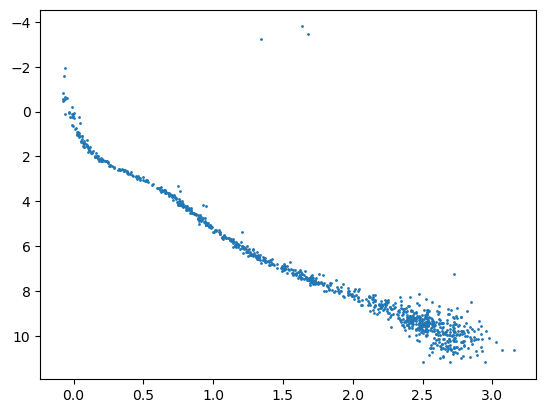

In [17]:
df_l1 = df_clusters_all.loc[df_clusters_all.labels==25]

plt.scatter(df_l1['phot_bp_mean_mag_obs'] - df_l1['phot_rp_mean_mag_obs'], df_l1['M_G_obs'], s=1)
plt.gca().invert_yaxis()

In [18]:
df_clusters_all.columns

Index(['ra', 'dec', 'parallax_obs', 'pmra_obs', 'pmdec_obs',
       'radial_velocity_obs', 'phot_g_mean_mag_obs', 'phot_bp_mean_mag_obs',
       'phot_rp_mean_mag_obs', 'j_obs', 'h_obs', 'k_obs', 'w1_obs', 'w2_obs',
       'w3_obs', 'w4_obs', 'irac1_obs', 'irac2_obs', 'irac3_obs', 'irac4_obs',
       'mips1_obs', 'M_G', 'X_obs', 'Y_obs', 'Z_obs', 'U', 'V', 'W',
       'ra_error', 'dec_error', 'parallax_error', 'pmra_error', 'pmdec_error',
       'radial_velocity_error', 'phot_g_mean_mag_error',
       'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error', 'j_error',
       'h_error', 'k_error', 'w1_error', 'w2_error', 'w3_error', 'w4_error',
       'irac1_error', 'irac2_error', 'irac3_error', 'irac4_error',
       'mips1_error', 'parallax', 'mass', 'X', 'Y', 'Z', 'logAge', 'feh',
       'A_V', 'labels', 'U_bulk', 'V_bulk', 'W_bulk', 'M_G_obs'],
      dtype='object')

233984

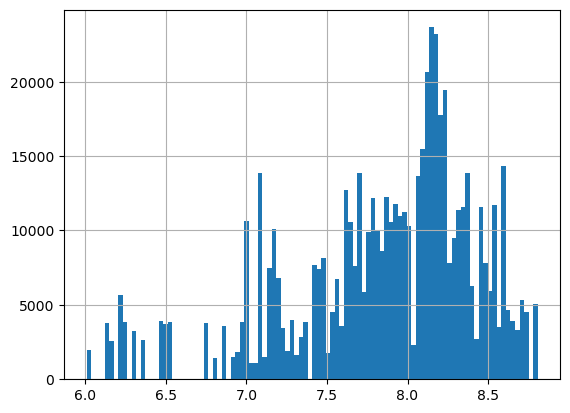

In [19]:
(df_clusters_all.logAge).hist(bins=100, log=False)
# (df_clusters_all.logAge).hist(bins=200, log=False)
np.sum(df_clusters_all.logAge < 7.8)

In [20]:
df_clusters_all.shape

(600435, 62)

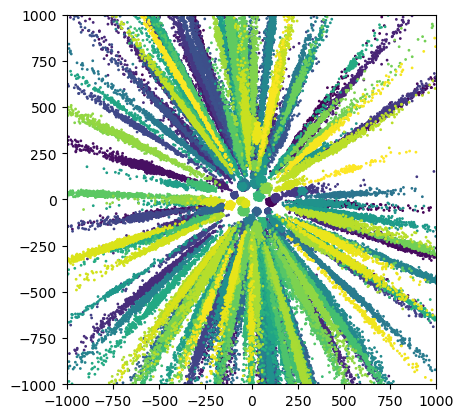

In [21]:
plt.scatter(df_clusters_all['X_obs'], df_clusters_all['Y_obs'], s=1, c=df_clusters_all['labels'])
lim = 1000
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [265]:
# features_all = input_features + output_features + other_features + ['labels']
# # 
# df_clusters_all[features_all].to_csv(
#     '/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/simulated_clusters_200new.csv', index=False
# )

In [266]:
# fig, axes = plt.subplots(2, 5, figsize=(25, 15), sharex=True, sharey=True)
# axes = axes.flatten()
# 
# plt_selection = '2mass'
# 
# data_info = {
#     'gaia': {
#         'xlim': (-1, 5),
#         'ylim': (14, -4),
#         'xlabel': 'BP-RP',
#         'ylabel': 'M_G',
#     },
#     '2mass': {
#         'xlim': (-0.5, 1),
#         'ylim': (-1, 2),
#         'xlabel': 'H-K',
#         'ylabel': 'J-H',
#     }
# }
# 
# fontsize = 25
# 
# for id, df_group in df_clusters_all.groupby('labels'):
#     logAge, feh_cluster, A_V_local, plx_true = df_group[['logAge', 'feh', 'A_V', 'parallax']].values.T
#     logAge = logAge[0]
#     feh_cluster = feh_cluster[0]
#     A_V_local = A_V_local[0]
#     dist_true = 1000/np.median(plx_true)
#     # Gaia 
#     if plt_selection == 'gaia':
#         x_data = df_group.phot_bp_mean_mag_obs - df_group.phot_rp_mean_mag_obs
#         y_data = df_group.M_G
#     elif plt_selection == '2mass':    
#         x_data = df_group.h_obs - df_group.k_obs
#         y_data = df_group.j_obs - df_group.h_obs
#     else:
#         raise ValueError('Invalid selection')
#     axes[id].scatter(
#         # Gaia CMD
#         x_data, y_data, c='k', 
#         label=f'Age: {10**logAge/1e6:.0f} Myr\nFeH: {feh_cluster:.1f} dex\nA_V: {A_V_local:.1f} mag\nd: {dist_true:.0f} pc', s=5,
#     )
#     axes[id].legend(frameon=False, fontsize=18)
#     axes[id].invert_yaxis()
#     if (id==0) or (id==5):
#         axes[id].set_ylabel(data_info[plt_selection]['ylabel'], fontsize=fontsize)
#     # else:
#         # plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
#         
#     if id > 4:
#         axes[id].set_xlabel(data_info[plt_selection]['xlabel'], fontsize=fontsize)
#         # axes[id].set_xticks([0, 2, 4])
#     # else:
#         # plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
#     # axes[id].set_title(f'Cluster {id}')
#     axes[id].set_xlim(*data_info[plt_selection]['xlim'])
#     axes[id].set_ylim(*data_info[plt_selection]['ylim'])
#     # Tick size
#     axes[id].tick_params(axis='both', which='major', labelsize=20)
# 
# # Compact layout
# plt.tight_layout(w_pad=0., h_pad=0.)
# # plt.savefig(f'/Users/ratzenboe/Desktop/figures/clusters_cc_{plt_selection}.png', dpi=300)

In [22]:
# Merge clusters with field stars
df_field['labels'] = -1
df_field['mass'] = np.nan
df_field['U_bulk'] = np.nan
df_field['V_bulk'] = np.nan
df_field['W_bulk'] = np.nan

In [31]:
df_field.columns

Index(['source_id', 'ra', 'dec', 'ra_error', 'dec_error', 'pmra', 'pmdec',
       'pmra_error', 'pmdec_error', 'parallax',
       ...
       'logAge', 'A_V', 'X_obs', 'Y_obs', 'Z_obs', 'labels', 'mass', 'U_bulk',
       'V_bulk', 'W_bulk'],
      dtype='object', length=186)

In [39]:
sample_field = False
if sample_field:
    df_field_sampled = df_field.sample(n=df_clusters_all.shape[0]//4, replace=False)
else:
    df_field_sampled = df_field.rename(columns={col: col + '_obs' for col in ['pmra', 'pmdec', 'radial_velocity']}, inplace=False)

features_all = input_features + output_features + other_features + ['mass', 'labels'] + ['pmra_obs', 'pmdec_obs', 'radial_velocity_obs'] + ['ra', 'dec'] + ['U_bulk', 'V_bulk', 'W_bulk'] + ['pmra_error', 'pmdec_error', 'radial_velocity_error', 'parallax_error']
df_all = pd.concat([df_field_sampled[features_all], df_clusters_all[features_all]], axis=0)
df_all.shape, df_clusters_all.shape

((827589, 56), (600435, 62))

In [40]:
df_all.columns

Index(['parallax_obs', 'phot_g_mean_mag_obs', 'phot_bp_mean_mag_obs',
       'phot_rp_mean_mag_obs', 'j_obs', 'h_obs', 'k_obs', 'w1_obs', 'w2_obs',
       'w3_obs', 'w4_obs', 'irac1_obs', 'irac2_obs', 'irac3_obs', 'irac4_obs',
       'mips1_obs', 'parallax_error', 'phot_g_mean_mag_error',
       'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error', 'j_error',
       'h_error', 'k_error', 'w1_error', 'w2_error', 'w3_error', 'w4_error',
       'irac1_error', 'irac2_error', 'irac3_error', 'irac4_error',
       'mips1_error', 'parallax', 'logAge', 'feh', 'A_V', 'X', 'Y', 'Z',
       'X_obs', 'Y_obs', 'Z_obs', 'mass', 'labels', 'pmra_obs', 'pmdec_obs',
       'radial_velocity_obs', 'ra', 'dec', 'U_bulk', 'V_bulk', 'W_bulk',
       'pmra_error', 'pmdec_error', 'radial_velocity_error', 'parallax_error'],
      dtype='object')

In [53]:
cols2keep = [
    'ra', 'dec', 'parallax_obs',
    'phot_g_mean_mag_obs', 'phot_bp_mean_mag_obs', 'phot_rp_mean_mag_obs', 
    'pmra_obs', 'pmdec_obs', 'radial_velocity_obs',
    'parallax_error', 'pmra_error', 'pmdec_error', 'radial_velocity_error',
    'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error',
    # True values
    'labels', 'logAge', 'U_bulk', 'V_bulk', 'W_bulk',
]

cols_final = [
    'ra', 'dec', 'parallax', 
    'pmra', 'pmdec', 'radial_velocity',
    'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
    # Errors
    'parallax_error', 'pmra_error', 'pmdec_error', 'radial_velocity_error',
    # 'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error',
    # True values
    'labels', 'logAge', 'U_bulk', 'V_bulk', 'W_bulk',
]

df_final = df_all[cols2keep].rename(columns={col: col.removesuffix('_obs') for col in cols2keep if col.endswith('_obs')})

In [46]:
# df_final[cols_final].to_csv('/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/edr3_mock_field_clusters-July-7.csv', index=False)

In [54]:
df = df_final[cols_final].reset_index(drop=True)

In [55]:
df['v_a'] = 4.74047 * df.pmra / df.parallax
df['v_d'] = 4.74047 * df.pmdec / df.parallax

In [56]:
# Compute observed X, Y, Z
from astropy.coordinates import SkyCoord, Distance
from astropy import units as u

dist = Distance(parallax=df.parallax.values*u.mas, allow_negative=True)
c = SkyCoord(ra=df.ra.values*u.deg, dec=df.dec.values*u.deg, distance=dist)
df['X'] = c.cartesian.x.value
df['Y'] = c.cartesian.y.value
df['Z'] = c.cartesian.z.value

(-100.0, 100.0)

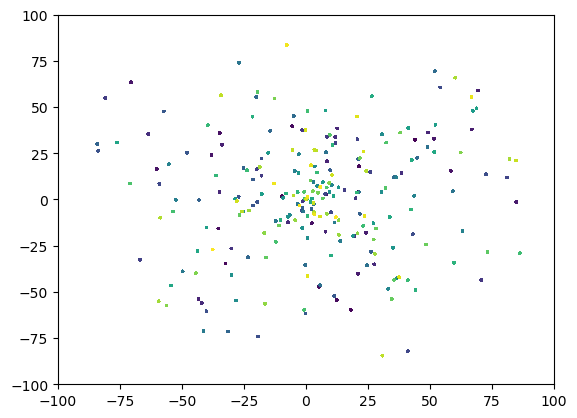

In [50]:
plt.scatter(df.U_bulk, df.V_bulk, s=1, c=df.labels)
plt.xlim(-100, 100)
plt.ylim(-100, 100)

In [61]:
cols_fixed = ['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'radial_velocity',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'parallax_error', 'pmra_error', 'pmdec_error',
       'radial_velocity_error', 'labels', 'logAge', 'U_bulk', 'V_bulk',
       'W_bulk', 'v_a', 'v_d', 'X', 'Y', 'Z']

# Remove duplicate columns
df2 = df.loc[:,~df.columns.duplicated()]

In [65]:
df2.shape

(827589, 23)

In [64]:
df2.to_csv('/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/edr3_mock_field_clusters-July-7.csv', index=False)

In [37]:
df_all.rename(columns={'parallax': 'parallax_true'}, inplace=True)

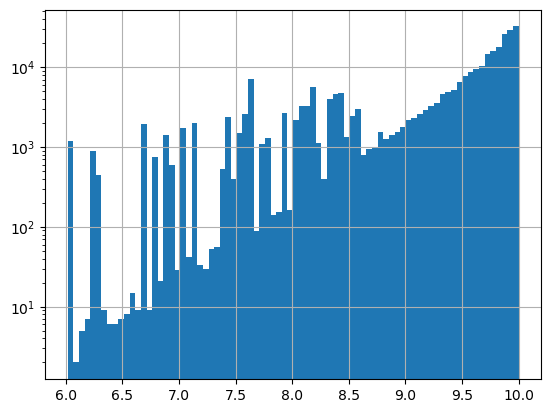

In [34]:
df_all.logAge.hist(bins=80, log=True);

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([12522,   911,   924,   840,  1017,  1021,  1028,   957,   910,
         1108,   983,   952,  1051,  1122,  1004,   950,  1113,  1061,
          971,   862,  1198,   972,  1153,   825,   851,   966,  1033,
          996,  1028,  1110,   988,   822,   868,   914,   888,  1200,
         1067,  1016,   943,   902,   994,  1024,  1040,   999,   961,
          903,   877,   944,   924,   962,  1177]))

# Add observed Av values

In [36]:
# Sample from truncated normal distribution
from scipy.stats import truncnorm

def sample_truncated_normal(mean, sd, low, upp):
    return truncnorm.rvs(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd
    )

# Sample from truncated normal distribution
Av_obs = sample_truncated_normal(
    df_all.A_V, 0.1, 0, np.inf
)

df_all['A_V_obs'] = Av_obs

In [35]:
# Random subset
df_all_subset = df_all.sample(frac=0.5).reset_index(drop=True)

features_X_max = [
    'parallax_obs', 'A_V_obs',
    'phot_g_mean_mag_obs', 'phot_bp_mean_mag_obs', 'phot_rp_mean_mag_obs',
    'j_obs', 'h_obs', 'k_obs', 
    'w1_obs', 'w2_obs', #'w3_obs', #'w4_obs',
    'irac1_obs', 'irac2_obs', 'irac3_obs', 'irac4_obs', #'mips1_obs', 
    # Errors (A_V error constant, so not needed)
    'parallax_error',
    'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error', 
    'j_error', 'h_error', 'k_error',
    'w1_error', 'w2_error', #'w3_error', #'w4_error',
    'irac1_error', 'irac2_error', 'irac3_error', 'irac4_error', #'mips1_error'
    'pmra', 'pmdec', 'radial_velocity', 'pmra_error', 'pmdec_error', 'radial_velocity_error'
]

features_y_max = ['parallax_true', 'logAge'] #, 'A_V', 'feh']

test_set = df_all_subset[features_X_max + features_y_max].isna().sum(axis=1)==0
df_all_subset['test_samples'] = test_set
df_all_subset['id'] = -1
df_all_subset.loc[df_all_subset.test_samples, 'id'] = np.arange(df_all_subset.test_samples.sum())

# df_test = df_all_subset.loc[df_all_subset.test_samples]
# df_test.shape

KeyError: "['A_V_obs', 'pmra', 'pmdec', 'radial_velocity', 'pmra_error', 'pmdec_error', 'radial_velocity_error'] not in index"

In [45]:
df_all_subset.shape, df_test.shape

((61852, 47), (27942, 47))

In [43]:
# Save data
df_all_subset.to_csv(
    '/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/edr3_mock_field_UNSEEN_clusters_TEST.csv', 
    index=False
)

In [ ]:
# Make plots

Text(0, 0.5, 'Y [pc]')

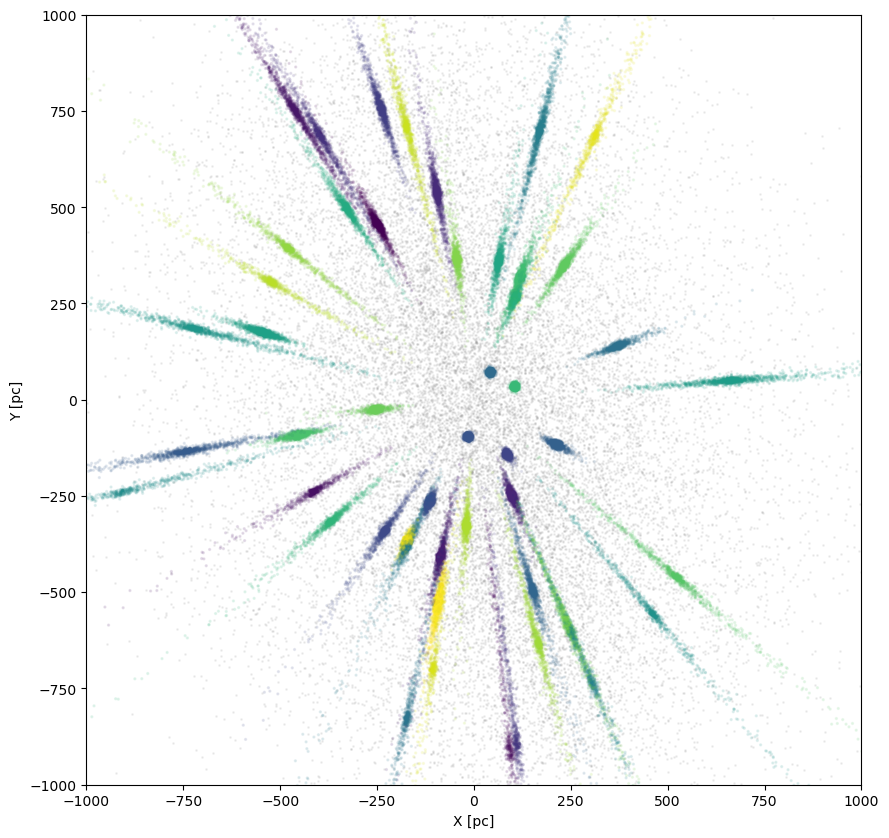

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(df_all.loc[df_all.labels==-1, 'X_obs'], df_all.loc[df_all.labels==-1, 'Y_obs'], s=1, alpha=0.1, color='tab:grey')
plt.scatter(
    df_all.loc[df_all.labels!=-1, 'X_obs'], df_all.loc[df_all.labels!=-1, 'Y_obs'], 
    s=2, alpha=0.1, c=df_all.loc[df_all.labels!=-1, 'labels'], #cmap='tab10'
)
lim = 1_000
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.xlabel('X [pc]')
plt.ylabel('Y [pc]')